In [1]:
import numpy as np
import matplotlib.pyplot as plt
import epidemic_model_classes_numba as epi_mod
from scipy.stats import pearsonr
import os
from tqdm import tqdm

In [2]:
log_flat = ["../logs/sdumont/log2021-05-27_02-07-17_fixed_DF_SEIRD_3_posts_30_day-window_past_False/",
            "../logs/sdumont/log2021-05-27_02-09-44_fixed_DF_SEIRD_3_posts_30_day-window_past_False/",
            "../logs/sdumont/log2021-05-27_02-12-16_fixed_DF_SEIRD_3_posts_30_day-window_past_False/",
            "../logs/sdumont/log2021-05-27_02-14-47_fixed_DF_SEIRD_3_posts_30_day-window_past_False/",
            "../logs/sdumont/log2021-05-27_02-17-15_fixed_DF_SEIRD_3_posts_30_day-window_past_False/"]

log_past = ["../logs/sdumont/log2021-05-27_02-19-50_fixed_DF_SEIRD_3_posts_30_day-window_past_True/",
            "../logs/sdumont/log2021-05-27_02-45-33_fixed_DF_SEIRD_3_posts_30_day-window_past_True/",
            "../logs/sdumont/log2021-05-27_03-11-44_fixed_DF_SEIRD_3_posts_30_day-window_past_True/",
            "../logs/sdumont/log2021-05-27_03-39-17_fixed_DF_SEIRD_3_posts_30_day-window_past_True/",
            "../logs/sdumont/log2021-05-27_04-03-31_fixed_DF_SEIRD_3_posts_30_day-window_past_True/"]

In [3]:
n_post = len(os.listdir(log_flat[0]))-1
days_folders = os.listdir(log_flat[0]+"/Posterior1/DF/SEIRD/")
for i in range(len(days_folders)):
    days_folders[i] = int(days_folders[i].split("_")[0])
days_folders.sort()
n_window = len(days_folders)

print(n_post)
print(n_window)
print(days_folders)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
3
79
[30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420]


In [4]:
seird = epi_mod.SEIRD

In [5]:
y_fit = np.zeros((n_window, 30, 2))
y_pred = np.zeros((n_window, 11, 2))

flat_params = np.zeros((len(log_flat), n_window, 9))
rmsd_flat_fit = np.zeros((len(log_flat), n_window))
rmsd_flat_pred = np.zeros((len(log_flat), n_window))
rmsd_flat_list = np.zeros((len(log_flat), n_window, 10, 2))
flat_tolerances = np.zeros((len(log_flat), n_post, n_window))

past_params = np.zeros((len(log_flat), n_window, 9))
rmsd_past_fit = np.zeros((len(log_flat), n_window))
rmsd_past_pred = np.zeros((len(log_flat), n_window))
rmsd_past_list = np.zeros((len(log_flat), n_window, 10, 2))
past_tolerances = np.zeros((len(log_flat), n_post, n_window))

In [6]:
for log_idx in range(len(log_flat)):
    for window in tqdm(range(n_window)):
        log = open(log_flat[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")
        y_fit[window] = np.loadtxt(log_flat[log_idx]+"Posterior1/DF/SEIRD/"+str(days_folders[window])+"_days/data.txt")[:30,1:]
        y_pred[window] = np.loadtxt(log_flat[log_idx]+"Posterior1/DF/SEIRD/"+str(days_folders[window])+"_days/data.txt")[-11:,1:]
        rmsd_flat_list[log_idx, window] = np.loadtxt(log_flat[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/val_error.txt")
        flat_params[log_idx, window] = np.loadtxt(log_flat[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_flat_fit[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_flat_pred[log_idx, window] = float(line.split(" ")[-1])

        for post in range(n_post):
            log = open(log_flat[log_idx]+"Posterior"+str(post+1)+"/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    flat_tolerances[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_flat[log_idx]+"Posterior"+str(post+1)+"/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    flat_tolerances[log_idx, post, window] = float(line.split(" ")[-1])
                
for log_idx in range(len(log_past)):
    for window in tqdm(range(n_window)):
        log = open(log_past[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")
        rmsd_past_list[log_idx, window] = np.loadtxt(log_past[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/val_error.txt")
        past_params[log_idx, window] = np.loadtxt(log_past[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_past_fit[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_past_pred[log_idx, window] = float(line.split(" ")[-1])
                
        for post in range(n_post):
            log = open(log_past[log_idx]+"Posterior"+str(post+1)+"/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    past_tolerances[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_past[log_idx]+"Posterior"+str(post+1)+"/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    past_tolerances[log_idx, post, window] = float(line.split(" ")[-1])

100%|██████████| 79/79 [00:17<00:00,  4.57it/s]


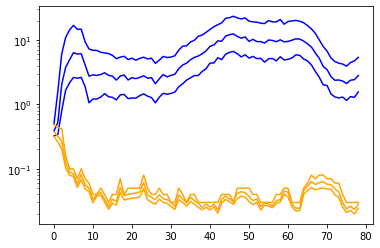

In [7]:
plt.plot(flat_tolerances[0].T, c="blue")
plt.plot(past_tolerances[0].T, c="orange")
plt.yscale("log")

Flat 0.12898948607594934
Past 0.021292430379746836


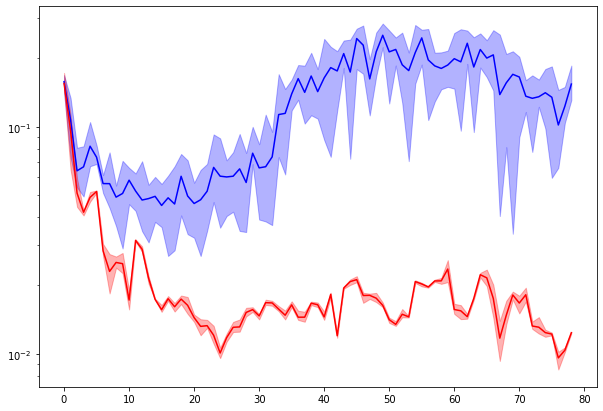

In [8]:
plt.figure(figsize=(10,7))
plt.plot(np.mean(rmsd_flat_fit, axis=0), color="blue")
plt.fill_between(np.arange(len(rmsd_flat_fit[0])), np.min(rmsd_flat_fit, axis=0), np.max(rmsd_flat_fit, axis=0), alpha=0.3, color="blue")
plt.plot(np.mean(rmsd_past_fit, axis=0), color="red")
plt.fill_between(np.arange(len(rmsd_flat_fit[0])), np.min(rmsd_past_fit, axis=0), np.max(rmsd_past_fit, axis=0), alpha=0.3, color="red")
plt.yscale("log")
print("Flat", np.mean(rmsd_flat_fit))
print("Past", np.mean(rmsd_past_fit))

Flat 1.049220040506329
Past 0.25165522025316456


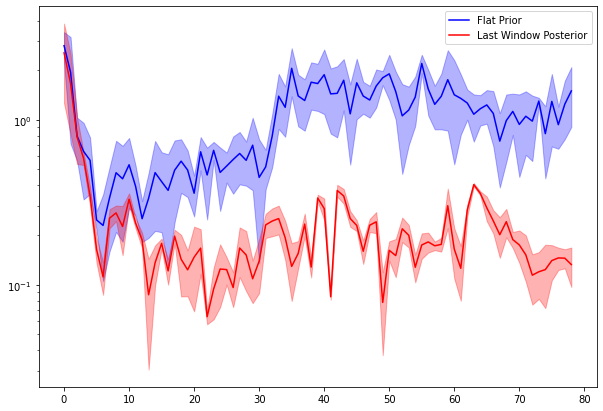

In [9]:
plt.figure(figsize=(10,7))
plt.plot(np.mean(rmsd_flat_pred, axis=0), color="blue", label="Flat Prior")
# plt.fill_between(np.arange(len(rmsd_flat_pred[0])), np.min(rmsd_flat_pred, axis=0), np.max(rmsd_flat_pred, axis=0), alpha=0.3, color="blue")
plt.fill_between(np.arange(len(rmsd_flat_pred[0])), np.mean(rmsd_flat_pred, axis=0)-np.std(rmsd_flat_pred, axis=0), 
                 np.mean(rmsd_flat_pred, axis=0)+np.std(rmsd_flat_pred, axis=0), alpha=0.3, color="blue")
plt.plot(np.mean(rmsd_past_pred, axis=0), color="red", label="Last Window Posterior")
# plt.fill_between(np.arange(len(rmsd_flat_pred[0])), np.min(rmsd_past_pred, axis=0), np.max(rmsd_past_pred, axis=0), alpha=0.3, color="red")
plt.fill_between(np.arange(len(rmsd_past_pred[0])), np.mean(rmsd_past_pred, axis=0)-np.std(rmsd_past_pred, axis=0), 
                 np.mean(rmsd_past_pred, axis=0)+np.std(rmsd_past_pred, axis=0), alpha=0.3, color="red")
plt.yscale("log")
plt.legend()
print("Flat", np.mean(rmsd_flat_pred))
print("Past", np.mean(rmsd_past_pred))

In [10]:
y_pred.shape

(79, 11, 2)

In [11]:
rmsd_flat_list.shape

(5, 79, 10, 2)

In [12]:
rmsd_flat_list_norm = np.abs((y_pred[:,2:,:]-rmsd_flat_list[:,:,1:])-(y_pred[:,1:-1,:]-rmsd_flat_list[:,:,:-1])-(y_pred[:,2:,:]-y_pred[:,1:-1,:]))/(y_pred[:,2:,:]-y_pred[:,1:-1,:]+1)
rmsd_past_list_norm = np.abs((y_pred[:,2:,:]-rmsd_past_list[:,:,1:])-(y_pred[:,1:-1,:]-rmsd_past_list[:,:,:-1])-(y_pred[:,2:,:]-y_pred[:,1:-1,:]))/(y_pred[:,2:,:]-y_pred[:,1:-1,:]+1)
# rmsd_past_list_norm = np.abs(rmsd_past_list)/(y_pred[:,1:,:]-y_pred[:,:-1,:]+1)

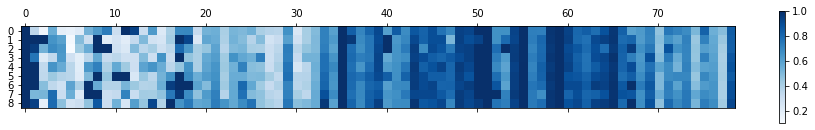

In [13]:
plt.matshow(np.mean(rmsd_flat_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Blues")
# plt.matshow(rmsd_flat_list_norm[:,:,0].T, vmax=1, cmap="Greens")
plt.colorbar()

In [14]:
rmsd_past_list_norm[:,:,0].shape

(5, 79, 2)

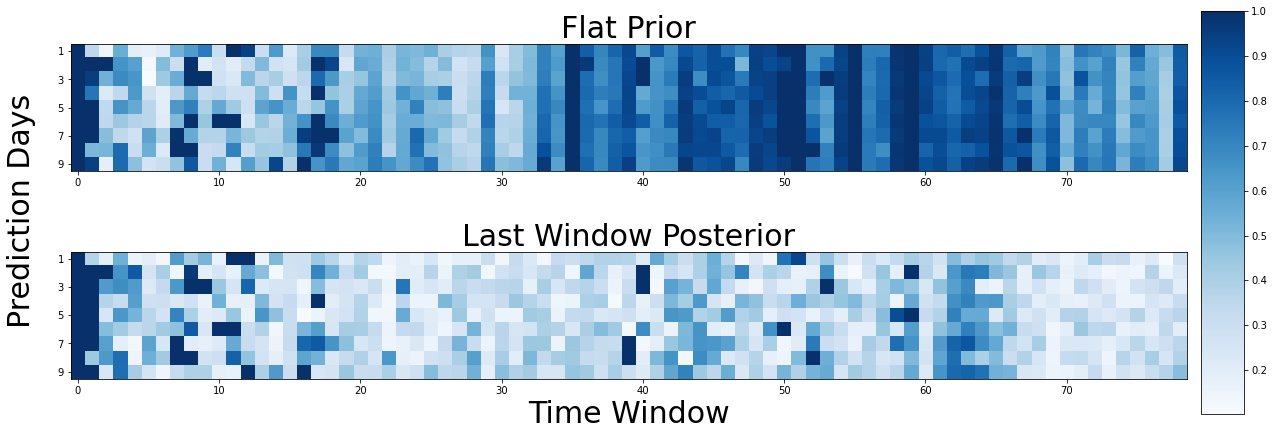

In [15]:
# fig, ax = plt.subplots(2,1, figsize=(20, 7))
# fig.
fig = plt.figure(figsize=(20,7))
# fig, ax = plt.subplots(2,1,sharey=True)
# plt.subplots_adjust(wspace=0.01)
plt.subplot(2,1,1)
pl = plt.imshow(np.mean(rmsd_flat_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Blues")
plt.yticks(range(0,10,2), labels=range(1,11,2))
plt.title("Flat Prior", fontsize=30)
plt.subplot(2,1,2)
plt.imshow(np.mean(rmsd_past_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Blues")
plt.yticks(range(0,10,2), labels=range(1,11,2))
plt.title("Last Window Posterior", fontsize=30)
plt.xlabel("Time Window", fontsize=30)
plt.text(-5, 4.5, "Prediction Days", rotation="vertical", fontsize=30)
cb_ax = fig.add_axes([0.91, 0.1, 0.03, 0.8])

fig.colorbar(pl, cax=cb_ax)
# plt.tight_layout()

In [16]:
rmsd_past_list_norm[0,30]

array([[0.01559111, 0.03685755],
       [0.18122219, 0.49155533],
       [0.27357956, 0.45860983],
       [0.23140565, 0.24244661],
       [0.02892028, 0.42212402],
       [0.28195344, 0.25321295],
       [0.271377  , 0.01675947],
       [0.33364262, 0.38035338],
       [0.41396642, 0.79700554]])

In [17]:
(np.sqrt(np.sum((rmsd_past_list[0,30,:,0])**2)/10)/(np.max(y_pred[30,1:,0])-np.min(y_pred[30,1:,0])+1.)
+np.sqrt(np.sum((rmsd_past_list[0,30,:,1])**2)/10)/(np.max(y_pred[30,1:,1])-np.min(y_pred[30,1:,1])+1.))/2

0.10922459028443213

In [18]:
y = np.concatenate(y_fit[::6,:,0])

In [19]:
flat_fit = np.zeros_like(y)
past_fit = np.zeros_like(y)
for window in tqdm(range(0, n_window, 6)):
    y0 = np.zeros(5)
    y0[-2:] = y_fit[window, 0]
    flat_fit[window//6*30:(window//6+1)*30] = seird.infected_dead(np.arange(30), flat_params[0, window], y0)[0]
    past_fit[window//6*30:(window//6+1)*30] = seird.infected_dead(np.arange(30), past_params[0, window], y0)[0]

100%|██████████| 14/14 [00:06<00:00,  2.27it/s]


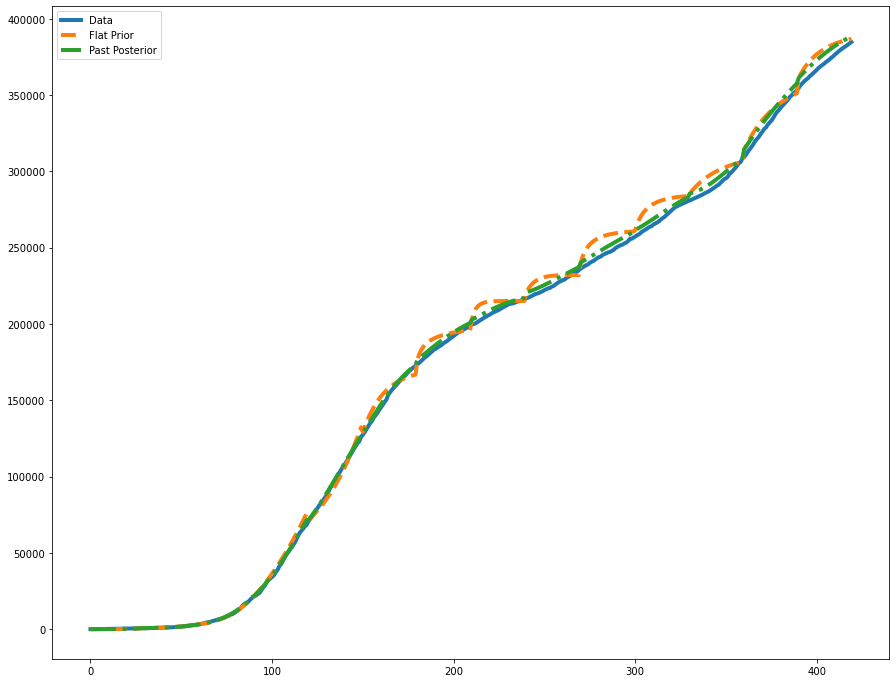

In [20]:
plt.figure(figsize=(15,12))
plt.plot(y, lw=4, label="Data")
plt.plot(flat_fit, "--", lw=4, label="Flat Prior")
plt.plot(past_fit, "-.", lw=4, label="Past Posterior")
plt.legend(loc="upper left")

In [21]:
pearsonr(rmsd_flat_fit.flatten(), rmsd_flat_pred.flatten())

(0.6825976304107719, 1.740093064791533e-55)

In [22]:
pearsonr(rmsd_past_fit.flatten(), rmsd_past_pred.flatten())

(0.8457780155241701, 2.829995663263151e-109)